# OUTLIER DETECTION

### Source:
- [https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/]
- [https://scikit-learn.org/stable/modules/outlier_detection]


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## INPUTS

In [2]:
data = pd.read_csv('data_outlier_1_4.csv', sep=',') 
# data_outlier_1_4.csv                         => should detect few outliers (they appear only at 1 point in the video)
# data_outlier_1_6.csv & data_outlier_2_2.csv => should detect multiple outliers (they appear several times in the video)

outlier_contamination_level=0.02    #0.14 for data 1_6 # 0.05 for data 2_2 #0.02 for data 1_4 

## DATA TREATMENT

In [3]:
print(data)
hmax=max(np.array(data.iloc[:,2]))
         
#features
t=np.array(data.iloc[:,0])
x=np.array(data.iloc[:,1])
h=np.array(data.iloc[:,2])
X=np.array([t,x,h])
X=np.transpose(X)

display(X)

            t    x    y
0    0.000000   77  262
1    0.041667   77  263
2    0.083333   77  263
3    0.125000   77  263
4    0.166667   77  265
..        ...  ...  ...
181  7.541667  242  900
182  7.583333  242  899
183  7.625000  242  900
184  7.666667  241  899
185  7.708333  241  899

[186 rows x 3 columns]


array([[0.00000000e+00, 7.70000000e+01, 2.62000000e+02],
       [4.16666667e-02, 7.70000000e+01, 2.63000000e+02],
       [8.33333333e-02, 7.70000000e+01, 2.63000000e+02],
       [1.25000000e-01, 7.70000000e+01, 2.63000000e+02],
       [1.66666667e-01, 7.70000000e+01, 2.65000000e+02],
       [2.08333333e-01, 7.60000000e+01, 2.65000000e+02],
       [2.50000000e-01, 7.60000000e+01, 2.65000000e+02],
       [2.91666667e-01, 7.60000000e+01, 2.65000000e+02],
       [3.33333333e-01, 7.60000000e+01, 2.65000000e+02],
       [3.75000000e-01, 7.70000000e+01, 2.65000000e+02],
       [4.16666667e-01, 7.70000000e+01, 2.65000000e+02],
       [4.58333333e-01, 7.70000000e+01, 2.65000000e+02],
       [5.00000000e-01, 7.70000000e+01, 2.65000000e+02],
       [5.41666667e-01, 7.70000000e+01, 2.65000000e+02],
       [5.83333333e-01, 7.70000000e+01, 2.65000000e+02],
       [6.25000000e-01, 7.80000000e+01, 2.65000000e+02],
       [6.66666667e-01, 7.80000000e+01, 2.65000000e+02],
       [7.08333333e-01, 7.70000

## LOCAL OUTLIER

works for data 1_4 but not 1_6

In [4]:
from sklearn.neighbors import LocalOutlierFactor

# identify outliers in the training dataset
lof = LocalOutlierFactor(contamination=outlier_contamination_level)
yhat = lof.fit_predict(X)

print(yhat)


for i,elem in zip(range(len(yhat)),yhat):
    if elem==-1:
        print(i)
        print(X[i,:])

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
64
[  2.66666667 445.          25.        ]
65
[  2.70833333 446.          25.        ]
66
[  2.75 445.    25.  ]
67
[  2.79166667 445.          25.        ]


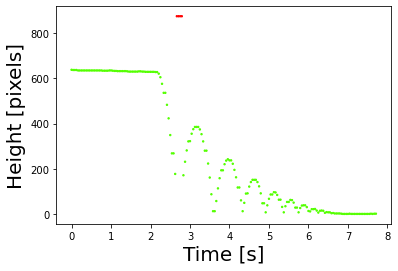

In [5]:
scat = plt.scatter(X[:,0], max(X[:,2])-X[:,2], s=2, c=yhat, cmap= 'prism')

plt.xlabel('Time [s]', fontsize=20)
plt.ylabel('Height [pixels]', fontsize=20)
plt.show()

## ELIPTIC ENVELOPE

works for data  1_4 and 1_6 (while LocalOutlierFactor don't for 1_6)

In [6]:
from sklearn.covariance import EllipticEnvelope

ee = EllipticEnvelope(contamination=outlier_contamination_level) #0.14 for data 1_6 #0.02 for data 1_4 # 0.05 for data 2_2
yhat = ee.fit_predict(X)

print(yhat)


for i,elem in zip(range(len(yhat)),yhat):
    if elem==-1:
        print(i)
        print(X[i,:])

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1]
64
[  2.66666667 445.          25.        ]
65
[  2.70833333 446.          25.        ]
66
[  2.75 445.    25.  ]
67
[  2.79166667 445.          25.        ]


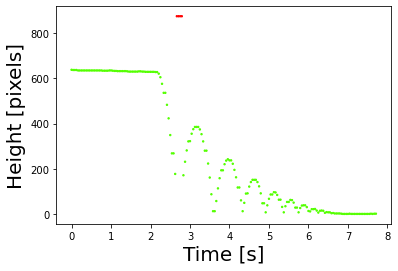

In [7]:
scat = plt.scatter(X[:,0], max(X[:,2])-X[:,2], s=2, c=yhat, cmap= 'prism')
plt.xlabel('Time [s]', fontsize=20)
plt.ylabel('Height [pixels]', fontsize=20)
plt.show()